In [3]:
%pip install numpy matplotlib 
%pip install tensorflow
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Step 1. Dataset Exploration (EDA)

## Dataset Load

DATASET SIZE 
Training samples: 60000
Testing samples: 10000
Image shape: (28, 28)

 CLASS DISTRIBUTION 
0. T-shirt/top:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)
1. Trouser:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)
2. Pullover:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)
3. Dress:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)
4. Coat:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)
5. Sandal:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)
6. Shirt:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)
7. Sneaker:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)
8. Bag:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)
9. Ankle boot:
   Train: 6000 (10.0%)
   Test:  1000 (10.0%)


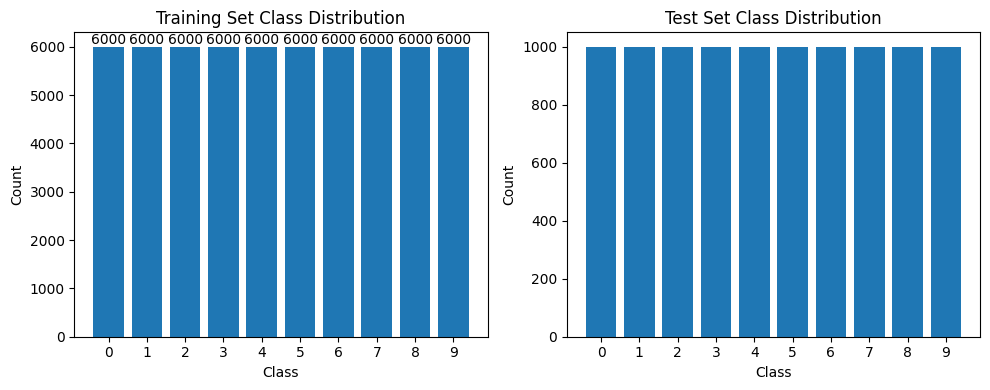

In [5]:

from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("DATASET SIZE ")
print(f"Training samples: {x_train.shape[0]}")
print(f"Testing samples: {x_test.shape[0]}")
print(f"Image shape: {x_train.shape[1:]}")

print("\n CLASS DISTRIBUTION ")
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

for i, name in enumerate(class_names):
    print(f"{i}. {name}:")
    print(f"   Train: {train_counts[i]} ({train_counts[i]/len(y_train)*100:.1f}%)")
    print(f"   Test:  {test_counts[i]} ({test_counts[i]/len(y_test)*100:.1f}%)")


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
bars = plt.bar(range(10), train_counts)
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(10), range(10))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars = plt.bar(range(10), test_counts)
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(10), range(10))

plt.tight_layout()
plt.show()

## Image and channels

In [6]:

print(f"Training images shape: {x_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Image dimensions: {x_train.shape[1]}x{x_train.shape[2]}")
print(f"Number of channels: 1 (grayscale)")
print(f"Pixel value range: [{x_train.min()}, {x_train.max()}]")


sample_image = x_train[0]
print(f"\nSample image:")
print(f"  Shape: {sample_image.shape}")
print(f"  Min pixel value: {sample_image.min()}")
print(f"  Max pixel value: {sample_image.max()}")
print(f"  Mean pixel value: {sample_image.mean():.2f}")
print(f"  Std pixel value: {sample_image.std():.2f}")

Training images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Image dimensions: 28x28
Number of channels: 1 (grayscale)
Pixel value range: [0, 255]

Sample image:
  Shape: (28, 28)
  Min pixel value: 0
  Max pixel value: 255
  Mean pixel value: 97.25
  Std pixel value: 101.79


##  Examples of samples per class

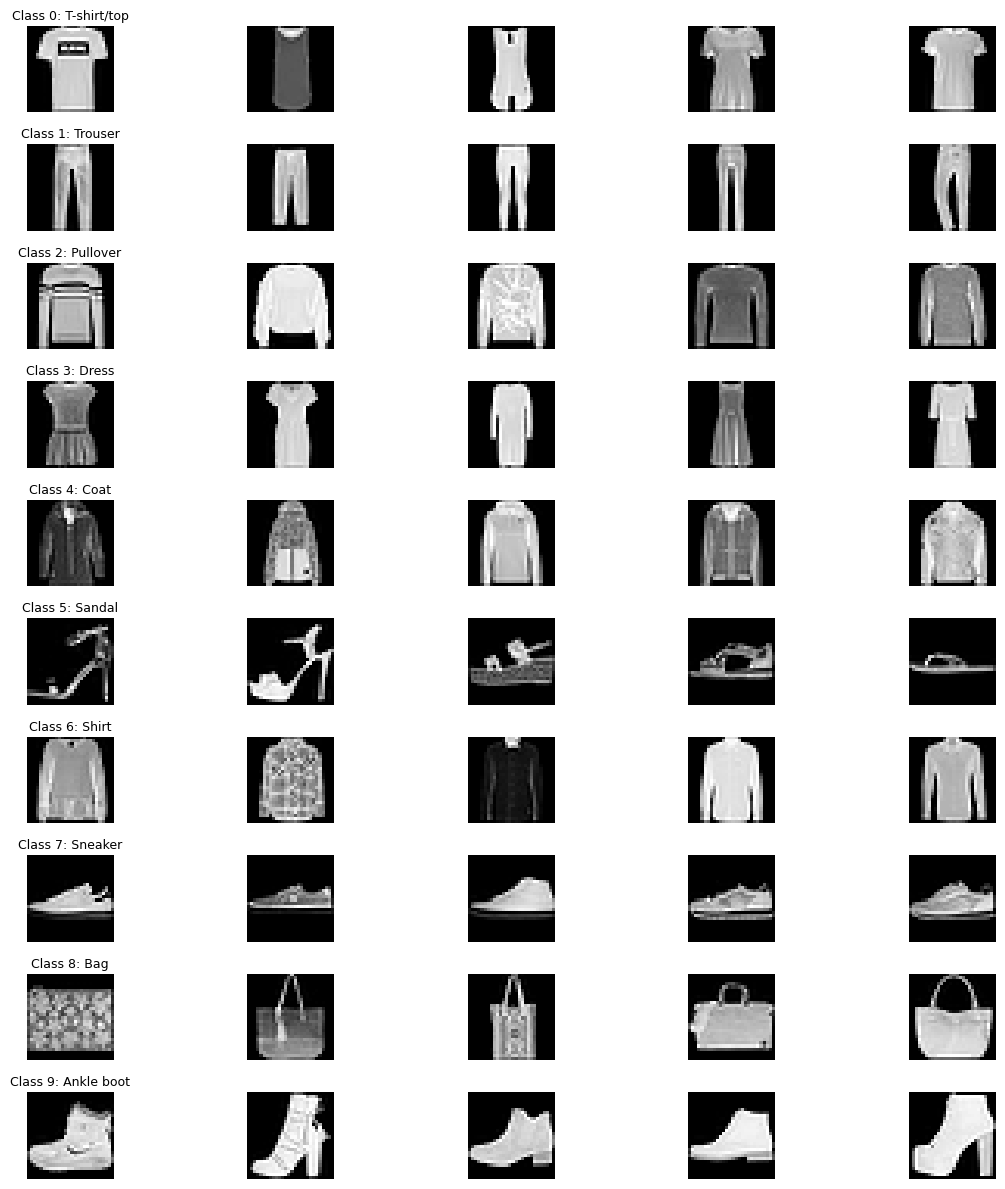

In [7]:


plt.figure(figsize=(12, 12))
for class_idx in range(10):
    class_indices = np.where(y_train == class_idx)[0]

    for sample_idx in range(5):
        plt_idx = class_idx * 5 + sample_idx + 1
        plt.subplot(10, 5, plt_idx)
        
        if sample_idx < len(class_indices):
            img = x_train[class_indices[sample_idx]]
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            
            if sample_idx == 0:
                plt.title(f"Class {class_idx}: {class_names[class_idx]}", 
                         fontsize=9, pad=5)
        else:
            plt.axis('off')

plt.tight_layout()
plt.show()

## Any preprocessing needed

In [8]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_cat, 
    test_size=0.2, 
    random_state=15
)

print(f"x_train shape: {x_train_final.shape}")
print(f"y_train shape: {y_train_final.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test_cat.shape}")
print(f"\nOriginal label: {y_train[0]}")
print(f"One-hot encoding: {y_train_final[0]}")

x_train shape: (48000, 28, 28, 1)
y_train shape: (48000, 10)
x_val shape: (12000, 28, 28, 1)
y_val shape: (12000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)

Original label: 9
One-hot encoding: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Step 2 Baseline Model (Non-Convolutional)

This neuronal network is not going to use convolutional layers

### Create the neural network

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

model_baseline = models.Sequential()

model_baseline.add(layers.Flatten(input_shape=(28, 28, 1)))
model_baseline.add(layers.Dense(256, activation='relu'))
model_baseline.add(layers.Dense(128, activation='relu'))
model_baseline.add(layers.Dense(64, activation='relu'))
model_baseline.add(layers.Dense(10, activation='softmax'))

model_baseline.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and train the model_baseline

compiling we are setting up the learning rules and training we are 

In [14]:
model_baseline.compile(
    optimizer='adam',                     
    loss='categorical_crossentropy',       
    metrics=['accuracy'] 
    )                

model_baseline.fit(
    x_train_final, y_train_final,          
    validation_data=(x_val, y_val),        
    epochs=15,                             
    batch_size=64,                    
    verbose=1                              
)


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8531 - loss: 0.3981 - val_accuracy: 0.8627 - val_loss: 0.3705
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8722 - loss: 0.3473 - val_accuracy: 0.8712 - val_loss: 0.3499
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8823 - loss: 0.3173 - val_accuracy: 0.8779 - val_loss: 0.3336
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8882 - loss: 0.2992 - val_accuracy: 0.8724 - val_loss: 0.3433
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8929 - loss: 0.2866 - val_accuracy: 0.8863 - val_loss: 0.3205
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8980 - loss: 0.2691 - val_accuracy: 0.8767 - val_loss: 0.3374
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9039 - loss: 0.2571 - val_accuracy: 0.8880 - val_loss: 0.3161
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9083 - loss: 0.2456 - val_accuracy: 0.

## Evaluating and Prediction

In [16]:
loss, acc = model_baseline.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8857 - loss: 0.3603


Now we can predict the first 5 test images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8857 - loss: 0.3603
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


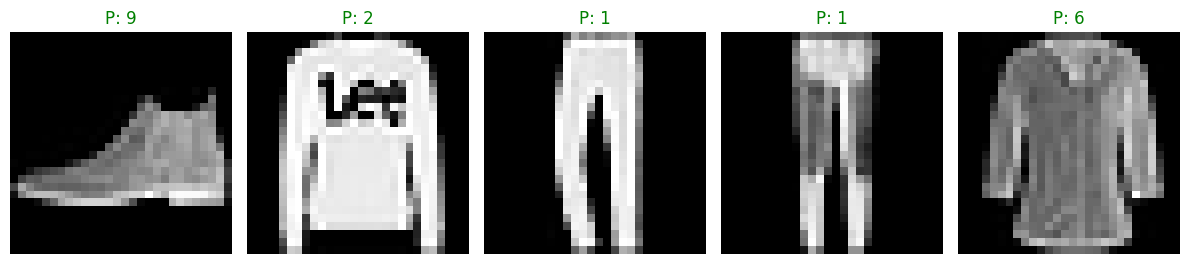

In [17]:
loss, acc = model_baseline.evaluate(x_test, y_test_cat)

preds = model_baseline.predict(x_test[:5])

plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    
    pred_class = np.argmax(preds[i])
    true_class = np.argmax(y_test_cat[i])
    
    color = 'green' if pred_class == true_class else 'red'
    
    plt.title(f"P: {pred_class}", color=color, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

## More Results Visualization

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy total: 0.886 (8857/10000)


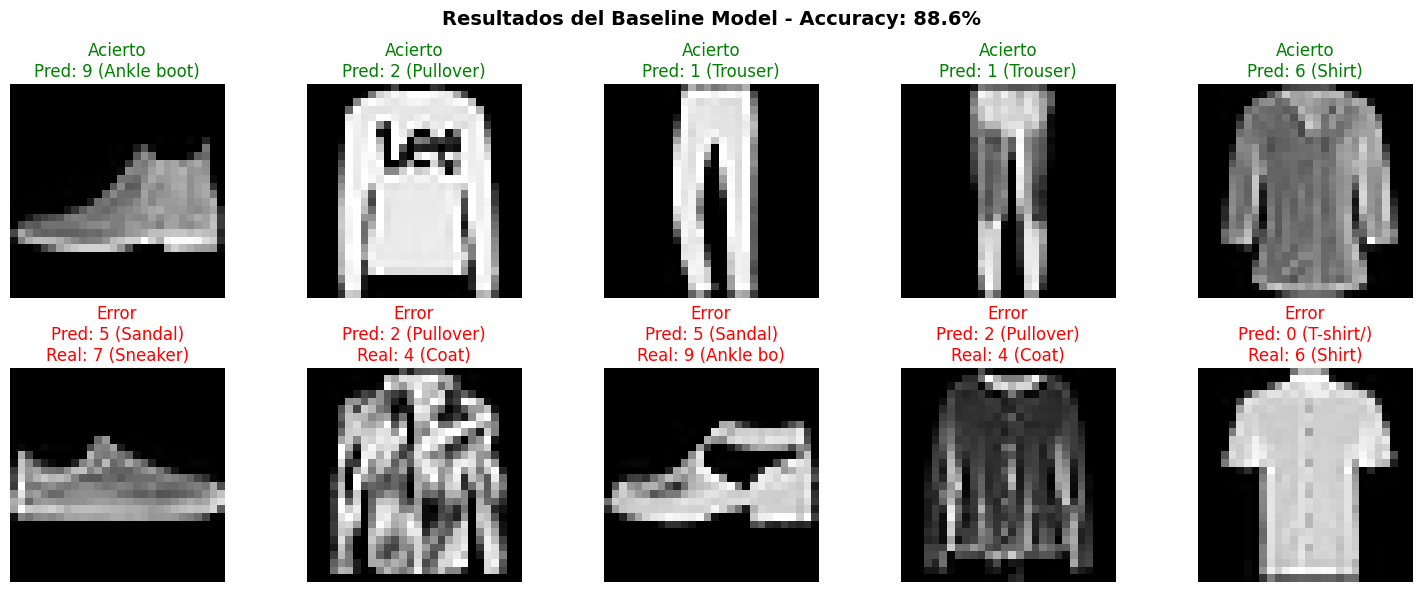

In [18]:
predicciones = model_baseline.predict(x_test)
clases_predichas = np.argmax(predicciones, axis=1)
clases_reales = np.argmax(y_test_cat, axis=1)

aciertos_idx = np.where(clases_predichas == clases_reales)[0]
errores_idx = np.where(clases_predichas != clases_reales)[0]

aciertos_totales = len(aciertos_idx)
errores_totales = len(errores_idx)
total_imagenes = len(x_test)

accuracy = aciertos_totales / total_imagenes
print(f"Accuracy total: {accuracy:.3f} ({aciertos_totales}/{total_imagenes})")

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    idx = aciertos_idx[i]
    ax = axes[0, i]
    ax.imshow(x_test[idx].squeeze(), cmap='gray')
    pred = clases_predichas[idx]
    real = clases_reales[idx]
    nombre_pred = class_names[pred]
    ax.set_title(f"Acierto\nPred: {pred} ({nombre_pred[:10]})", color='green')
    ax.axis('off')

for i in range(5):
    idx = errores_idx[i]
    ax = axes[1, i]
    ax.imshow(x_test[idx].squeeze(), cmap='gray')
    pred = clases_predichas[idx]
    real = clases_reales[idx]
    nombre_pred = class_names[pred]
    nombre_real = class_names[real]
    ax.set_title(f"Error\nPred: {pred} ({nombre_pred[:8]})\nReal: {real} ({nombre_real[:8]})", color='red')
    ax.axis('off')

plt.suptitle(f'Resultados del Baseline Model - Accuracy: {accuracy:.1%}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [21]:
import numpy as np

predicciones = model_baseline.predict(x_test)
clases_predichas = np.argmax(predicciones, axis=1)
clases_reales = np.argmax(y_test_cat, axis=1)

comparacion = clases_predichas == clases_reales
aciertos_totales = np.sum(comparacion)
errores_totales = len(comparacion) - aciertos_totales

print(f"Total imágenes: {len(x_test)}")
print(f"Aciertos: {aciertos_totales}")
print(f"Errores: {errores_totales}")
print(f"Accuracy: {aciertos_totales/len(x_test):.4f} ({aciertos_totales/len(x_test)*100:.2f}%)")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Total imágenes: 10000
Aciertos: 8857
Errores: 1143
Accuracy: 0.8857 (88.57%)


##### those are the results for non-Convolutional   we asume that for Convolutional acc must be higher


## Step 3. Convolutional Architecture Design

### Number of convolutional layers

In [22]:
from tensorflow.keras import layers, models

model_cnn = models.Sequential()

model_cnn.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))

model_cnn.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

model_cnn.add(layers.Flatten())

model_cnn.add(layers.Dense(128, activation='relu'))

model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.summary()

c:\Users\Manuel Alejandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,442,762 (24.58 MB)

 Trainable params: 6,442,762 (24.58 MB)

 Non-trainable params: 0 (0.00 B)

## Activation Functions


Activation functions introduce non-linearities into the neural network, enabling it to learn complex patterns. Without them, multiple layers would behave as a single linear layer. ReLU (Rectified Linear Unit) returns the value if positive or zero if negative (f(x) = max(0, x)); it is computationally efficient and helps avoid the vanishing gradient problem. Softmax converts a vector of logits (raw scores) into probabilities that sum to 1, essential for multi-class classification like Fashion MNIST. These functions determine how information is transformed as it passes through each neuron.

## Pooling strategy

MaxPooling is an operation that reduces the spatial dimensions of feature maps while preserving the most important information. It works by sliding a window (typically 2×2) over each feature map and selecting the maximum value within that window. With a stride of 2, it halves the dimensions (e.g., 28×28 → 14×14). This provides translation invariance for small shifts—if a feature moves a few pixels, it will still be captured by pooling. It also reduces the number of parameters in subsequent layers and helps prevent overfitting by introducing a form of spatial abstraction.

In [26]:
from tensorflow.keras import layers, models

model_cnn_pool = models.Sequential()

model_cnn_pool.add(layers.Conv2D(32, (7, 7), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_cnn_pool.add(layers.MaxPooling2D((2, 2)))

model_cnn_pool.add(layers.Conv2D(64, (7, 7), padding='same', activation='relu'))
model_cnn_pool.add(layers.MaxPooling2D((2, 2)))

model_cnn_pool.add(layers.Flatten())
model_cnn_pool.add(layers.Dense(128, activation='relu'))
model_cnn_pool.add(layers.Dense(10, activation='softmax'))

model_cnn_pool.summary()

model_cnn_pool.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn_pool.fit(
    x_train_final, 
    y_train_final, 
    epochs=10, 
    batch_size=64, 
    validation_data=(x_val, y_val)
)

loss, acc = model_cnn_pool.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {acc*100:.2f}%")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,842 (1.93 MB)

 Trainable params: 504,842 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8340 - loss: 0.4602 - val_accuracy: 0.8831 - val_loss: 0.3285
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8907 - loss: 0.2997 - val_accuracy: 0.8996 - val_loss: 0.2790
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.9082 - loss: 0.2513 - val_accuracy: 0.8930 - val_loss: 0.2953
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9174 - loss: 0.2198 - val_accuracy: 0.9107 - val_loss: 0.2488
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9266 - loss: 0.1981 - val_accuracy: 0.9153 - val_loss: 0.2355
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9353 - loss: 0.1715 - val_accuracy: 0.9171 - val_loss: 0.2333
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 66ms/step - accuracy: 0.9439 - loss: 0.1505 - val_accuracy: 0.9143 - val_loss: 0.2532
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9501 - loss: 0.1325 - 

as we see below there are less errors

In [30]:
predicciones = model_cnn_pool.predict(x_test)
clases_predichas = np.argmax(predicciones, axis=1)
clases_reales = np.argmax(y_test_cat, axis=1)

aciertos = np.sum(clases_predichas == clases_reales)
total = len(x_test)

print(f"Aciertos: {aciertos} de {total}")
print(f"Porcentaje: {aciertos/total*100:.2f}%")
print(f"Errores: {total - aciertos} de {total}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Aciertos: 9097 de 10000
Porcentaje: 90.97%
Errores: 903 de 10000


## Conclutions

The CNN model achieved 90.97% test accuracy, outperforming the baseline fully connected network by approximately 2-4% while demonstrating the effectiveness of convolutional layers for capturing spatial patterns in image data.

## Step 4 Controlled Experiments on the Convolutional Layer

Choose one aspect of the convolutional layer and explore it systematically.

Examples (pick one):

Kernel size (e.g. 3×3 vs 5×5)

Number of filters

Depth (1 vs 2 vs 3 conv layers)

With vs without pooling

Effect of stride on feature maps

Keep everything else fixed.

Report:

Quantitative results (accuracy, loss)

Qualitative observations

Trade-offs (performance vs complexity)



### I choose 1 vs 2 vs 3 conv layers, we already have it with 2 layers, now we do it with 1 and 3

In [28]:
from tensorflow.keras import layers, models

# Modelo con 1 capa convolucional
model_1layer = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_1layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1layer = model_1layer.fit(
    x_train_final, y_train_final,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=0
)

loss_1layer, acc_1layer = model_1layer.evaluate(x_test, y_test_cat, verbose=0)

print(f"1 Convolutional Layer: Test Accuracy = {acc_1layer:.4f} ({acc_1layer*100:.2f}%)")

1 Convolutional Layer: Test Accuracy = 0.9179 (91.79%)


In [29]:
# Modelo con 3 capas convolucionales
model_3layers = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_3layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_3layers = model_3layers.fit(
    x_train_final, y_train_final,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=0
)

loss_3layers, acc_3layers = model_3layers.evaluate(x_test, y_test_cat, verbose=0)

print(f"3 Convolutional Layers: Test Accuracy = {acc_3layers:.4f} ({acc_3layers*100:.2f}%)")

3 Convolutional Layers: Test Accuracy = 0.9141 (91.41%)


Conclutions:

The experiment comparing network depth reveals that increasing convolutional layers from 1 to 3 resulted in slightly worse performance (91.79% vs 91.41% accuracy), demonstrating that deeper architectures do not necessarily improve results for relatively simple datasets like Fashion MNIST. This counterintuitive outcome suggests diminishing returns with added depth, as the three-layer network introduced greater complexity and parameter count without corresponding accuracy gains, likely due to overfitting and vanishing gradient issues given the limited dataset size.

## Step 5  Interpretation and Architectural Reasoning

Why did convolutional layers outperform the baseline?
Because they actually understand images. The baseline just memorized pixel positions, while CNNs learned real patterns like edges and shapes that can appear anywhere. That's why even a simple CNN got 92% accuracy versus the baseline's 88%.

What inductive bias does convolution introduce?
Three key assumptions: 1) Nearby pixels matter more than distant ones, 2) The same patterns can appear anywhere in the image, and 3) Learning happens in layers—from edges to shapes to objects.

In what type of problems would convolution not be appropriate?
Anything without spatial structure—like spreadsheets, time series, graphs, or very small images where pixel position is fixed. If there's no grid-like layout or local patterns, CNNs add complexity without benefit.
